<a href="https://colab.research.google.com/github/shinnew99/Apziva-Projects/blob/main/Project2-TermDepositMarketing/1stLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install lazypredict
# !pip install --upgrade lazypredict
# !pip install pycaret

In [ ]:
!pip install imblearn

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
import os
import random
# Warnings
import warnings
warnings.filterwarnings("ignore")

# EDA
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
# 1st layer
# from lazypredict.Supervised import LazyClassifier
# import pycaret  # It doesn't work due to the inccompatible versions of packages.
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE  # We use imbalanced-learn library.
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
# 2nd layer
from xgboost import XGBClassifier

# 3rd layer

# Validation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Read dataset
df = pd.read_csv('/content/drive/MyDrive/Apziva/TermDepositMarketing/term-deposit-marketing-2020.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


## Data Description

Features: <br>
- age : age of customer (numeric)
- job : type of job (categorical)
- marital : marital status (categorical)
- education (categorical)
- default: has credit in default? (binary)
- balance: average yearly balance, in euros (numeric)
- housing: has a housing loan? (binary)
- loan: has personal loan? (binary)
- contact: contact communication type (categorical)
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical)
- duration: last contact duration, in seconds (numeric)
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target): <br>
y - has the client subscribed to a term deposit? (binary)

## EDA - checking some details of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [ ]:
negative = df[df['y']=='no']['y'].count()  # 37104
positive = df[df['y']=='yes']['y'].count() # 2896
target = df[['y']]['y'].count() # 40000
# I can see that the data is imbalanced

print(negative/target)  # 0.9276
print(positive/target)  # 0.0724

0.9276
0.0724


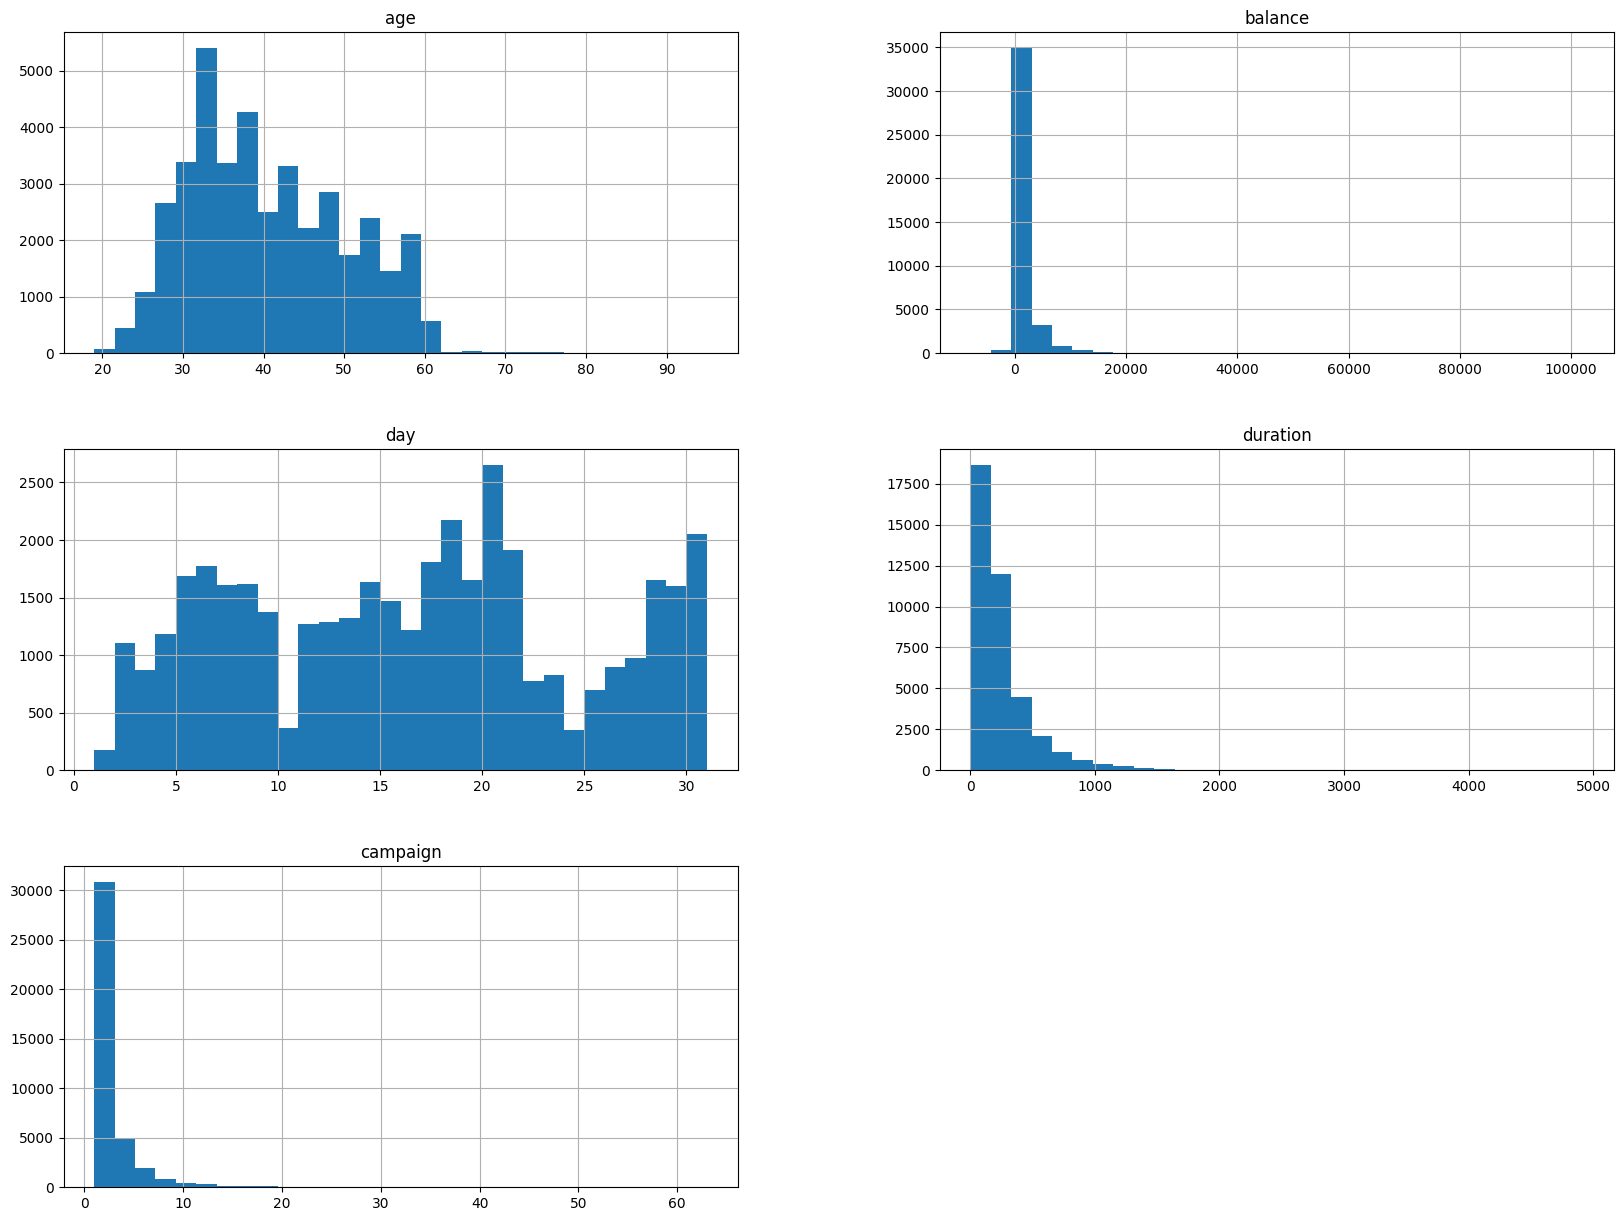

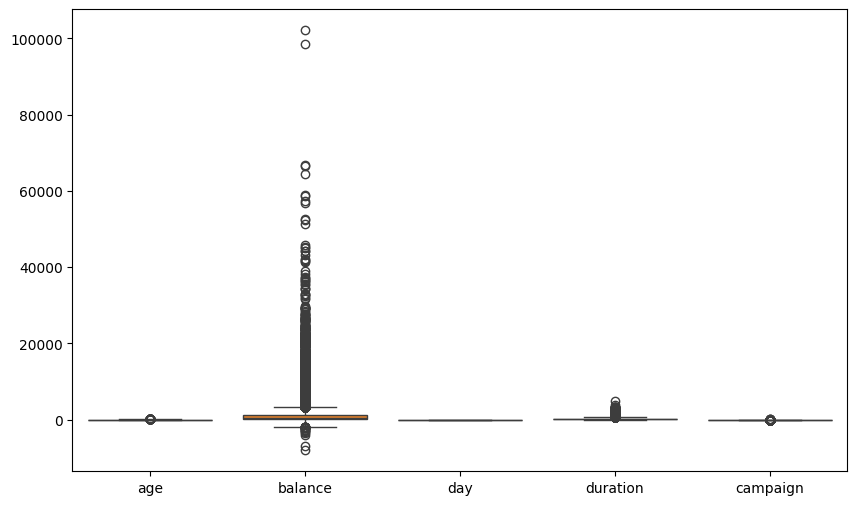

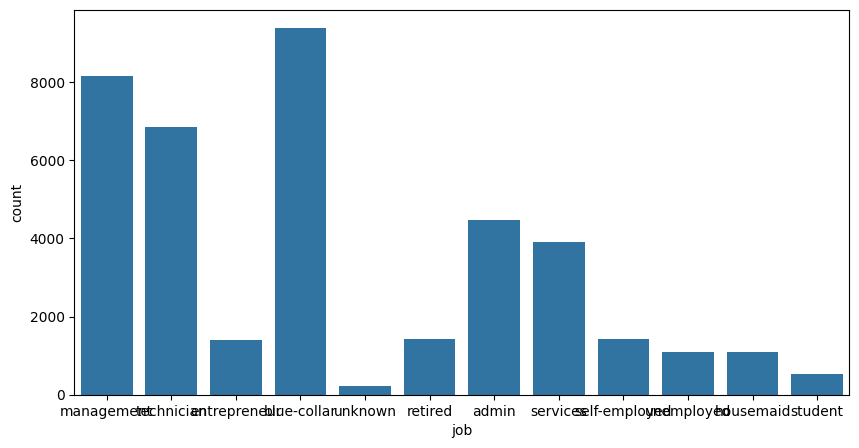

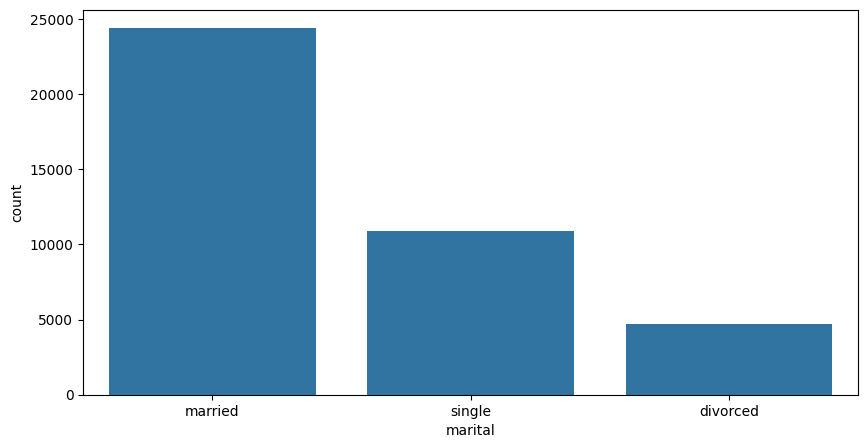

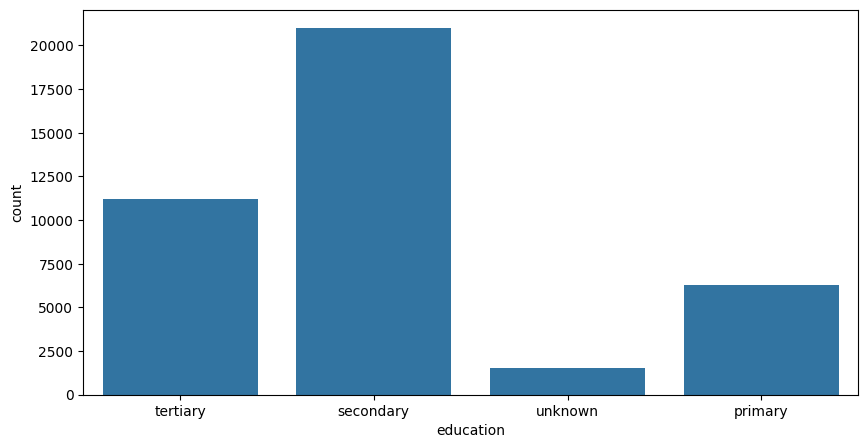

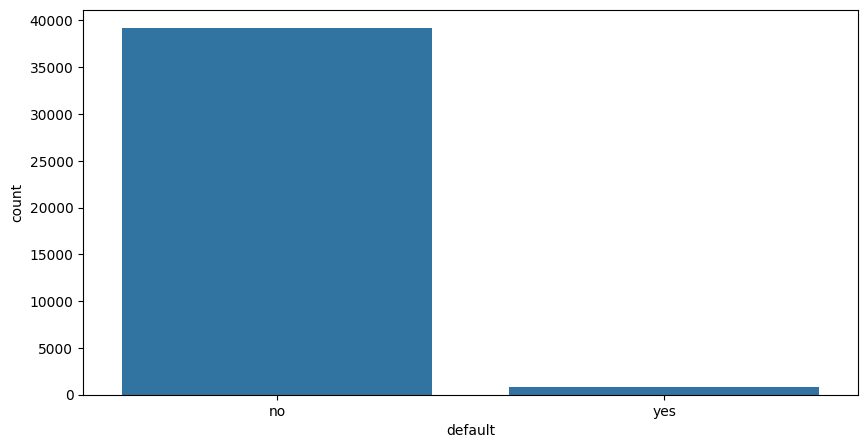

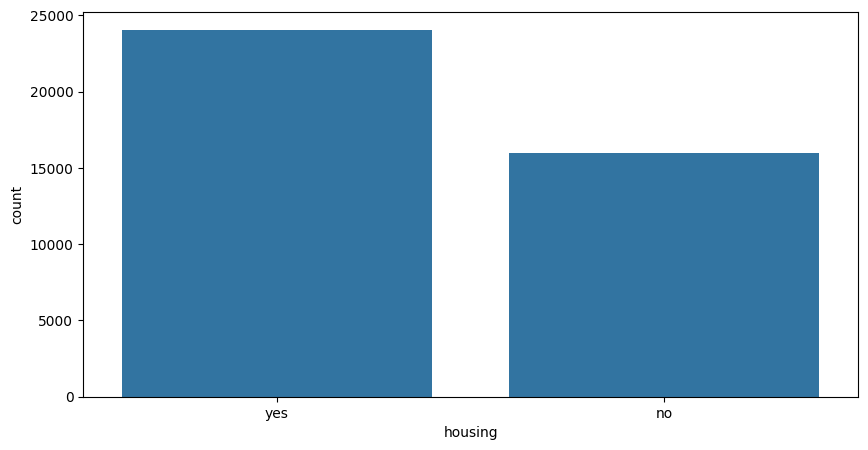

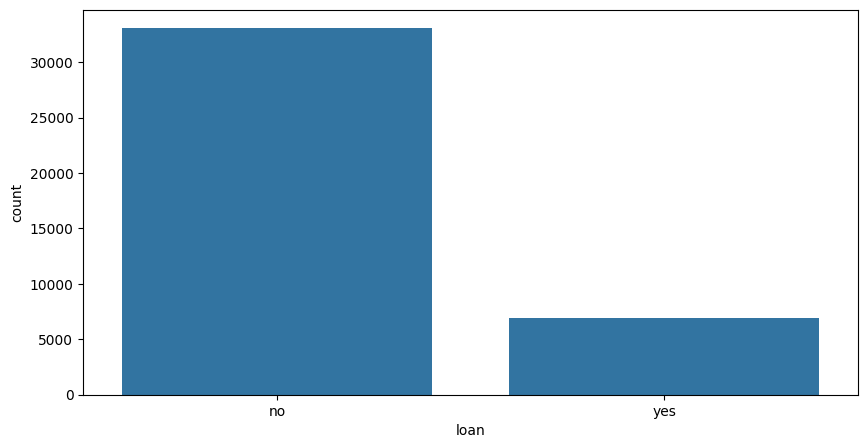

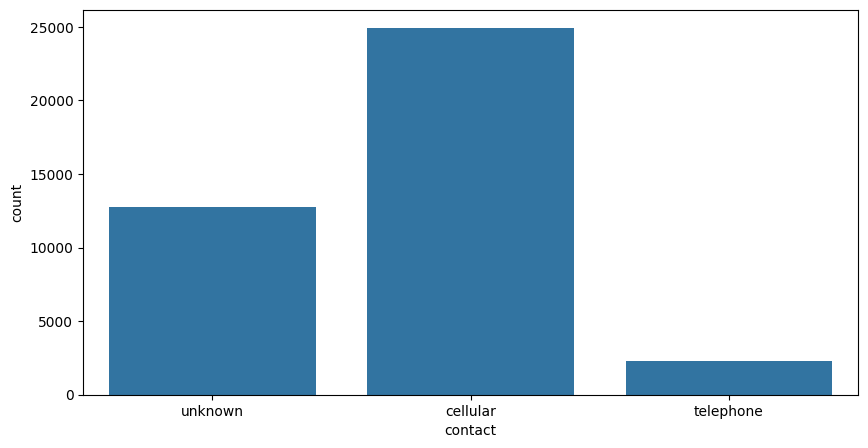

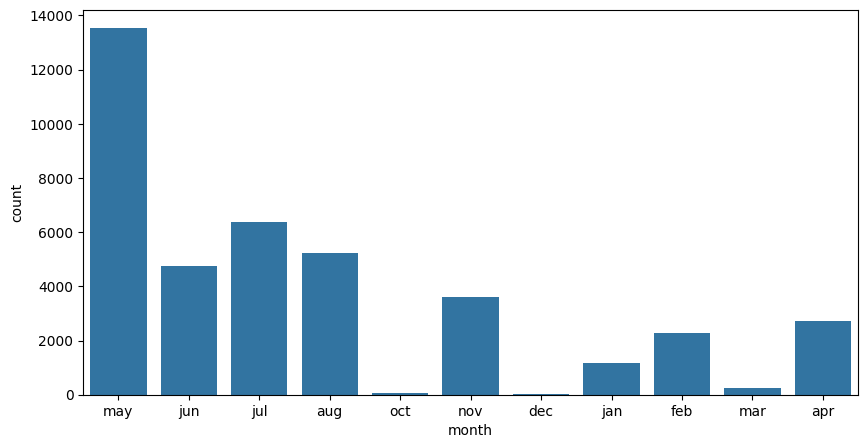

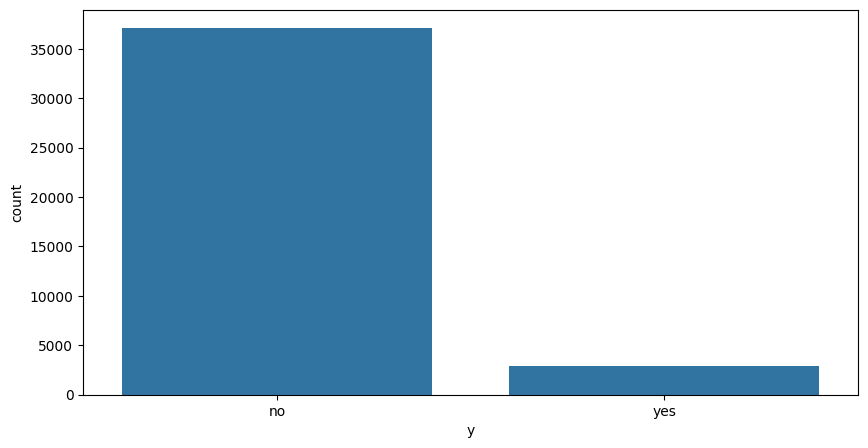

In [ ]:
# Histograms
df.hist(bins=30, figsize=(20,15))

# Count plots for categorical variables
df_copy = df.copy()
categorical_object_columns = df_copy.select_dtypes(include=['object']).columns

# Box plots
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

# Count plots for categorical variables
for col in categorical_object_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df)
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

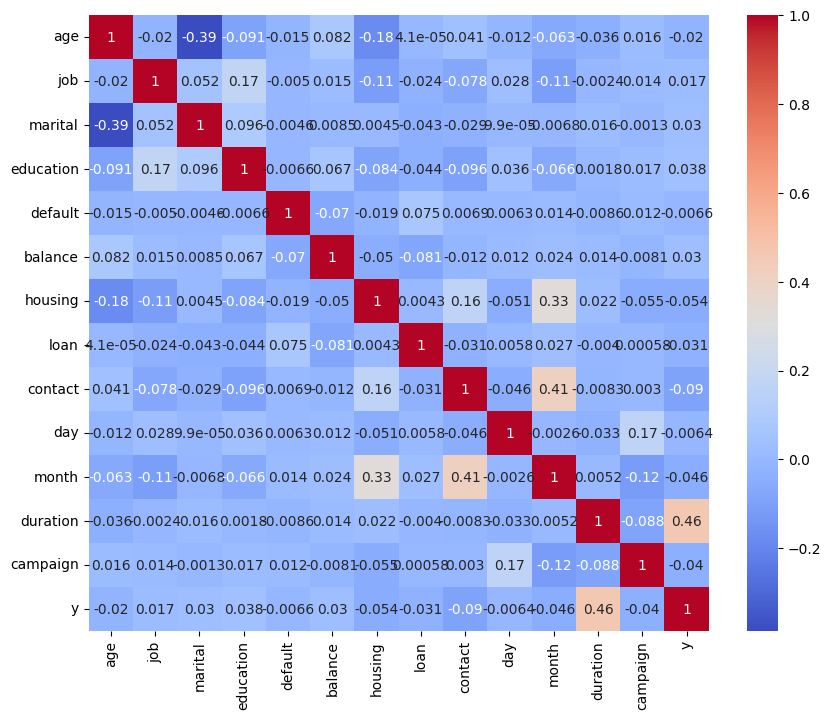

In [ ]:
for col in categorical_object_columns:
  df_copy[col] = df_copy[col].astype('category').cat.codes

correlation_matrix = df_copy.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show

In [ ]:
# Count plots for categorical variables
df_copy = df.copy()

## Models - 3 layers

1. 1st Layer: A layer to predict which of the potential customers we should make calls to (haven't make any calls yet,can't use any call-related features like duration, campaign, month of the call and etc).
2. 2nd Layer: A layer to predict which of the customers we should keep calling to. This means calls have already been made, I can use call-related data, actually predicting which of the customers we should keep calling to make calls to.

They do not directly affect each other because in
3. 3rd Layer: Train both with the unsupervised model, to understand who those customers are and filtered the non-subscribers. The goal is to segment the subscribers.

In [ ]:
seed = random.randint(1000, 9999)
print(seed)

9724


In [ ]:
X1 = df_copy.drop(columns=['duration', 'campaign', 'day', 'month', 'y'])  #Q1. I remove the call-related features, are these correct? The dtypes of each of them are objects and
y1 = df_copy['y']

# Identify categorical columns
categorical_columns = X1.select_dtypes(include=['object']).columns
print(categorical_columns)
print(X1)

# Encode categorical features
label_encoder = LabelEncoder()
print(label_encoder)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact'], dtype='object')
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married 

In [ ]:
for col in categorical_columns:
  X1[col] = label_encoder.fit_transform(X1[col])
  # label_encoder[col] = label_encoder
  # I can replace to One-hot encoding => it's not always necessary



# Split the dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=seed)

In [ ]:
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.4.2

In [ ]:
# from lazypredict.Supervised import LazyClassifier

# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(X1_train, X1_test, y1_train, y1_test)  # Since I apply it to X1 dataset, is it only applicable to X1?
# print(models)

In [ ]:
# import pycaret
# pycaret.__version__

### 1st layer: ML model that predicts which of the potential customers we should make calls to

In [ ]:
model1 = RandomForestClassifier(random_state=seed)
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)
print(classification_report(y1_test, y1_pred))  # the result is skewed, since the data is imbalanced

              precision    recall  f1-score   support

          no       0.93      0.99      0.96     11125
         yes       0.29      0.07      0.11       875

    accuracy                           0.92     12000
   macro avg       0.61      0.53      0.53     12000
weighted avg       0.88      0.92      0.90     12000



Steps for the 1st Layer:
1. RandomUnderSampler (Random Forest Classifier inlcuded)
2. SMOTE
3. SMOTE-TOMEK
4. SMOTEEN

In [ ]:
# 1st Layer: RandomForestClassifier
# 1. Apply RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=seed)
X1_train_rus, y1_train_rus = undersample.fit_resample(X1_train, y1_train)

model1_1 = RandomForestClassifier(class_weight='balanced', random_state=seed)
model1_1.fit(X1_train_rus, y1_train_rus)
y1_pred_rus = model1_1.predict(X1_test)
print(f"Random Under Sampled Applied: \n", classification_report(y1_test, y1_pred_rus))


# 2. Apply SMOTE (Synthetic Minority Oversampling Technique) -
sm = SMOTE(sampling_strategy = 'minority', random_state=seed)
X1_train_sm, y1_train_sm = sm.fit_resample(X1_train, y1_train)

model1_2 = RandomForestClassifier(class_weight='balanced', random_state=seed)
model1_2.fit(X1_train_sm, y1_train_sm)
y1_pred_sm = model1_2.predict(X1_test)
print(f"SMOTE Applied: \n", classification_report(y1_test, y1_pred_sm))


# 3. Apply SMOTE-TOMEK
smt = SMOTETomek(random_state=seed)  # sampling_strategy = 'minority',
X1_train_smt, y1_train_smt = smt.fit_resample(X1_train, y1_train)

model1_3 = RandomForestClassifier(class_weight='balanced', random_state=seed)
model1_3.fit(X1_train_smt, y1_train_smt)
y1_pred_smt = model1_2.predict(X1_test)
print(f"SMOTE Applied: \n", classification_report(y1_test, y1_pred_smt))


# 4. Apply SMOTEEN to balance the classes
smn = SMOTEENN(random_state=seed)
X1_train_smn, y1_train_smn = smn.fit_resample(X1_train, y1_train)

model1_4 = RandomForestClassifier(class_weight='balanced', random_state=seed)
model1_4.fit(X1_train_smn, y1_train_smn)
y1_pred_smn = model1_4.predict(X1_test)
print(f"SMOTEEN Applied: \n", classification_report(y1_test, y1_pred_smn))


# 5.
print(f"Original dataset shape: {Counter(y1_train)}")
print(f"RandomUnderSampled dataset shape: {Counter(y1_train_rus)}")
print(f"SMOTED dataset shape: {Counter(y1_train_sm)}")
print(f"Applied dataset shape: {Counter(y1_train_smt)}")
print(f"SMOTEENN dataset shape: {Counter(y1_train_smn)}")

Random Under Sampled Applied: 
               precision    recall  f1-score   support

          no       0.95      0.58      0.72     11125
         yes       0.10      0.57      0.17       875

    accuracy                           0.58     12000
   macro avg       0.52      0.58      0.44     12000
weighted avg       0.88      0.58      0.68     12000

SMOTE Applied: 
               precision    recall  f1-score   support

          no       0.94      0.86      0.89     11125
         yes       0.12      0.24      0.16       875

    accuracy                           0.81     12000
   macro avg       0.53      0.55      0.53     12000
weighted avg       0.88      0.81      0.84     12000

SMOTE Applied: 
               precision    recall  f1-score   support

          no       0.94      0.86      0.89     11125
         yes       0.12      0.24      0.16       875

    accuracy                           0.81     12000
   macro avg       0.53      0.55      0.53     12000
weighted

In [ ]:
df_copy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [ ]:
 # To finish the 1st layer, after train the model with OpTuna, test the model with the entire dataset (40,000 records) and then calculate the sum of the duration of all 40,000 records
 # Then calculate the sum of the duration for all predicted customers(subscribers) as one (predict the 40000 records whether they will subscribe or not - maybe it could be 20,000 or 30,000)
 # See how much time the company can save -
 # Also calculate how many customers will I be loosing - (count the number of False Negatives)


import optuna
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, classification_report, confusion_matrix


# Step 1: Objective Function
def objective(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 300)  # which numbers to set up, try 10, 100, 1000 (even 1000 might not work well)
  max_depth = trial.suggest_int('max_depth', 10, 30)  # maybe 2, 20, 200, 3, 30, 300, not smaller than 10
  # try to give bigger range
  min_samples_split = trial.suggest_int('min_samples_split', 2, 200)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 300)

  # Step 2: Initialize RandomForestClassifier
  model = RandomForestClassifier(
      n_estimators = n_estimators,
      max_depth=max_depth,
      min_samples_split=min_samples_split,
      min_samples_leaf=min_samples_leaf,
      class_weight='balanced',
      random_state=seed
  )

  # Step 3: Select Resampling Method (e.g., RandomUnderSampler, SMOTE, SMOTE-TOMEK, SMOTEENN)
  resampling_method = trial.suggest_categorical('resampler', ['RandomUnderSampler', 'SMOTE', 'SMOTETomek', 'SMOTEEN'])

  if resampling_method == 'RandomUnderSampler':
    resampler = RandomUnderSampler(sampling_strategy='majority', random_state=seed)
  elif resampling_method == "SMOTE":
    resampler = SMOTE(sampling_strategy = 'minority', random_state=seed)
  elif resampling_method == "SMOTETomek":
    resampler = SMOTETomek(random_state=seed)
  else:
    resampler = SMOTEENN(random_state=seed)

  # Step 4: Applying Resampling
  X_resampled, y_resampled = resampler.fit_resample(X1_train, y1_train)

  # Step 5: Training Model
  model.fit(X_resampled, y_resampled)

  # Step 6: Evaluation Performance (recall)
  y_pred = model.predict(X1_test)
  recall = recall_score(y1_test, y_pred, average='macro')  # 'macro' considers class imbalance

  return recall


# Step 7: Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Step 8: Printing out the optimized hyperparameter
print("Best trial:")
trial = study.best_trial

print(f"  Recall: {trial.value}")
print("  Best hyperparameters: ", trial.params)

# Step 9: Train model with optimized parameters
best_params = trial.params
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    class_weight='balanced',
    random_state=seed
)

# Prepare data with selected resampling method
resampler_type = best_params['resampler']
if resampler_type == 'RandomUnderSampler':
    resampler = RandomUnderSampler(sampling_strategy='majority', random_state=seed)
elif resampler_type == 'SMOTE':
    resampler = SMOTE(sampling_strategy='minority', random_state=seed)
elif resampler_type == 'SMOTETomek':
    resampler = SMOTETomek(random_state=seed)
else:
    resampler = SMOTEENN(random_state=seed)

# Resampling and Model Training
X_resampled, y_resampled = resampler.fit_resample(X1_train, y1_train)
best_model.fit(X_resampled, y_resampled)

# Evaluate the final model
y_pred_best = best_model.predict(X1_test)
print(f"Optimized model classification report:\n", classification_report(y1_test, y_pred_best))

[I 2024-10-10 11:01:43,942] A new study created in memory with name: no-name-fbcc6fbd-ff36-4ae2-a282-a3ceba2925ea
[I 2024-10-10 11:02:07,995] Trial 0 finished with value: 0.5675248796147673 and parameters: {'n_estimators': 200, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 6, 'resampler': 'SMOTE'}. Best is trial 0 with value: 0.5675248796147673.
[I 2024-10-10 11:02:18,474] Trial 1 finished with value: 0.5756918138041733 and parameters: {'n_estimators': 262, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 9, 'resampler': 'SMOTEEN'}. Best is trial 1 with value: 0.5756918138041733.
[I 2024-10-10 11:02:24,966] Trial 2 finished with value: 0.577900481540931 and parameters: {'n_estimators': 109, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 11, 'resampler': 'SMOTETomek'}. Best is trial 2 with value: 0.577900481540931.
[I 2024-10-10 11:02:39,138] Trial 3 finished with value: 0.5619967897271267 and parameters: {'n_estimators': 228, 'max_depth': 17, '

Best trial:
  Recall: 0.6135473515248796
  Best hyperparameters:  {'n_estimators': 263, 'max_depth': 26, 'min_samples_split': 15, 'min_samples_leaf': 15, 'resampler': 'RandomUnderSampler'}
Optimized model classification report:
               precision    recall  f1-score   support

          no       0.95      0.62      0.75     11125
         yes       0.11      0.60      0.19       875

    accuracy                           0.62     12000
   macro avg       0.53      0.61      0.47     12000
weighted avg       0.89      0.62      0.71     12000



In [ ]:
# Step 10: Test the model on the entire dataset (40,000 records) and calcualte the sum of the duration
y_pred_all = best_model.predict(X1)  # Predict on the entire dataset X1
df['y_pred'] = y_pred_all  # Add predictions to the dataframe


# 1. Calculate the sum of the duration of all records
total_duration_sec = df['duration'].sum()
total_duration_hrs = total_duration_sec // 3600


# 2. Calculate the sum of the duration for all predicted customers (subscribers)
subscribed_duration_sec = df[df['y_pred'] == 'yes']['duration'].sum()
subscribed_duration_hrs = subscribed_duration_sec // 3600


# 3. Calculate how much time the company can save
time_saved_sec = total_duration_sec - subscribed_duration_sec
time_saved_hrs = time_saved_sec // 3600

print(f"Total duration hrs of all customers: {total_duration_hrs}")
print(f"Total duration of predicted subscribers: {subscribed_duration_hrs}")
print(f"Estimated time the company can save: {time_saved_hrs}")


# 4. Count the number of False Negatives (actual subscribers who are predcited as non-subscribers): try to capture all of the people,
# Actual answer is y, 'yes' but predicted as 'no'
false_negatives = ((df['y'] == 'yes') & (df['y_pred'] == 'no')).sum()
total_actual_subscribers = (df['y']=='yes').sum()
percentage_lost = round((false_negatives/total_actual_subscribers)*100, 2)

print(f"Number of customers lost (False Negatives): {false_negatives}")
print(f"Number of customers lost (False Negatives) %: {percentage_lost}")

# calculate the percentage, to save unwanted calls - avoid calling people who will not subscribe (maybe 200 hours)
# if described "10% of subscribers" will be loosing -> easier way to persuade the people

Total duration hrs of all customers: 2831
Total duration of predicted subscribers: 1176
Estimated time the company can save: 1655
Number of customers lost (False Negatives): 1008
Number of customers lost (False Negatives) %: 34.81
